<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Challenge" data-toc-modified-id="Challenge-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Challenge</a></span></li><li><span><a href="#Root-Locus-Sketching:-Steps-5-6" data-toc-modified-id="Root-Locus-Sketching:-Steps-5-6-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Root Locus Sketching: Steps 5-6</a></span><ul class="toc-item"><li><span><a href="#Step-5:-Identify-places-where-the-root-locus-&quot;breaks-away&quot;-from-or-&quot;breaks-in&quot;-to-the-real-axis." data-toc-modified-id="Step-5:-Identify-places-where-the-root-locus-&quot;breaks-away&quot;-from-or-&quot;breaks-in&quot;-to-the-real-axis.-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Step 5: Identify places where the root locus "breaks away" from or "breaks in" to the real axis.</a></span><ul class="toc-item"><li><span><a href="#Example" data-toc-modified-id="Example-2.1.1"><span class="toc-item-num">2.1.1&nbsp;&nbsp;</span>Example</a></span><ul class="toc-item"><li><span><a href="#Step-1" data-toc-modified-id="Step-1-2.1.1.1"><span class="toc-item-num">2.1.1.1&nbsp;&nbsp;</span>Step 1</a></span></li><li><span><a href="#Step-2" data-toc-modified-id="Step-2-2.1.1.2"><span class="toc-item-num">2.1.1.2&nbsp;&nbsp;</span>Step 2</a></span></li><li><span><a href="#Step-3" data-toc-modified-id="Step-3-2.1.1.3"><span class="toc-item-num">2.1.1.3&nbsp;&nbsp;</span>Step 3</a></span></li><li><span><a href="#Step-4" data-toc-modified-id="Step-4-2.1.1.4"><span class="toc-item-num">2.1.1.4&nbsp;&nbsp;</span>Step 4</a></span></li></ul></li><li><span><a href="#Step-5" data-toc-modified-id="Step-5-2.1.2"><span class="toc-item-num">2.1.2&nbsp;&nbsp;</span>Step 5</a></span></li></ul></li><li><span><a href="#Step-6:-If-you-suspect-that-the-root-locus-crosses-into-the-right-half-of-the-s-plane,-find-out-where-and-how" data-toc-modified-id="Step-6:-If-you-suspect-that-the-root-locus-crosses-into-the-right-half-of-the-s-plane,-find-out-where-and-how-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Step 6: If you suspect that the root locus crosses into the right half of the s-plane, find out where and how</a></span><ul class="toc-item"><li><span><a href="#Example" data-toc-modified-id="Example-2.2.1"><span class="toc-item-num">2.2.1&nbsp;&nbsp;</span>Example</a></span></li></ul></li></ul></li><li><span><a href="#Disciplined-Process:-Steps-1-6-of-sketching-the-root-locus" data-toc-modified-id="Disciplined-Process:-Steps-1-6-of-sketching-the-root-locus-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Disciplined Process: Steps 1-6 of sketching the root locus</a></span></li><li><span><a href="#Exercises-for-steps-1-6-of-root-locus-sketching:-Due-Monday,-October-12-before-class." data-toc-modified-id="Exercises-for-steps-1-6-of-root-locus-sketching:-Due-Monday,-October-12-before-class.-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Exercises for steps 1-6 of root locus sketching: Due Monday, October 12 before class.</a></span><ul class="toc-item"><li><span><a href="#Exercise-1" data-toc-modified-id="Exercise-1-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Exercise 1</a></span></li><li><span><a href="#Exercise-2" data-toc-modified-id="Exercise-2-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Exercise 2</a></span></li></ul></li></ul></div>

# Challenge

In this notebook, your challenge is to expand your tool set for sketching root locus plots to answer two important questions:

1. **WHERE** does the root locus enter and/or leave a segment that lies on the real axis?
2. **DOES** the system ever go unstable for a positive root locus gain $K$, and if so, what gain $K$ will make the system go unstable?

Answers to these questions improve the usefulness of the root locus for us-- as we design a controller that gives us behavior we like, we may be interested in how close some (or all) of the poles are to being oscillatory, which is something we will know if we compute where sements of the root locus that are on the root locus enter or leave it. 

Additionally, it is critical to know whether and if we expect our system to go *unstable* under closed loop control. If we do suspect that our system can go unstable, knowing *how close* our design is to that stability limit is very valuable.

In the following sections, we will explore how we might answer these questions.

**IMPORTANT: This notebook provides an interactive plot as a tool to help you build understanding. This plot is coded in the Python language, so in order to use Octave language in this notebook, we need a special `magic` command at the top of each code cell. To enable this, you MUST run the cell below before attempting today's assignments. In the assignments themselves, `%%octave` must be at the top of each code cell so Jupyter knows to interpret your code as Octave, rather than Python.**

In [7]:
%load_ext oct2py.ipython

The oct2py.ipython extension is already loaded. To reload it, use:
  %reload_ext oct2py.ipython


# Root Locus Sketching: Steps 5-6

We will now go through a little more detail about how to complete steps 5 and 6 of the root locus sketching guidelines from the "Root Locus Overview" reading assignment.

To reiterate, we're talking about drawing the root locus of this system:

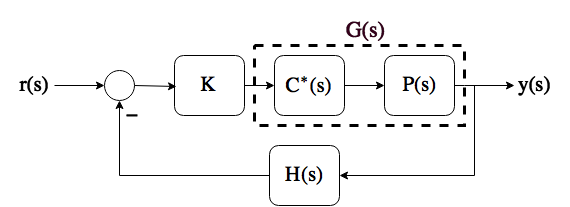

Which has the closed loop transfer function $G_{cl}(s) = \frac{y(s)}{r(s)}=\frac{KG}{1+KGH}$. The steps we'll cover in this notebook are:

* (5) If applicable, calculate any points on the real axis where the root locus "breaks in" to the real axis or "breaks away" from the real axis, using the fact that at such a point,
$$\frac{d}{ds}G(s)H(s)=0$$
* (6) If you suspect that the root locus crosses into the right half of the s-plane (based on the asymptote angles), calculate the crossing frequency (where the system crosses into unstable territory) and critical gain (gain that makes this happen) using the closed loop characteristic equation. Plug the point $s=s_{crossing}=j\omega_{crossing}$ into the open loop transfer function $G(s)H(s)$ to find the value of $K=K_{critical}$ that will result in an unstable system.

## Step 5: Identify places where the root locus "breaks away" from or "breaks in" to the real axis.





In the last reading, we learned about how to tell whether a segment of the root locus (consisting of either 1 or 2 branches) lies on a portion of the real axis, and we learned how to compute the angles and intersection point of any asymptotes that represent how (spatially) the closed loop poles of our system go to infinity (if any do). What we did not learn yet is how to tell exactly *where* in one of these segments a branch or pair of branches enters or leaves the real axis. We will look at how this happens explicitly, and you'll notice that I've released this notebook in the Python 3 programming language. This is because Python 3 allows me to put interactive plots right into the Jupyter notebok, whereas Octave and MATLAB do not. Let's take a look at what happens when we vary the root locus gain factor K on a system with $G(s)H(s) = \frac{10}{(s+1)(s+10)}$. In the output of the cell below, move the slider to change K and watch what happens right as the root locus is about to "break away" from the real axis. Also note that I've plotted the system's closed-loop step response for you to see, which should help you internalize the relationship between the s-plane and time-domain behavior of a system.

In [2]:

from __future__ import print_function
from ipywidgets import interact, interactive, fixed, interact_manual
import ipywidgets as widgets

from matplotlib.pyplot import *
from scipy.signal import lti,step
from numpy import *

# to build a TF in python, we use the format:
# lti([a,b,c,...,m],[a,b,c,...,n]) to build a transfer function model by specifying numerator and 
# denominator coefficients in decreasing powers of 's'. This is also possible with MATLAB's 'tf' function, but
# we have not been doing it that way.

#GH = 10/((s+1)(s+10)) = 10/(s^2+11s+10)


#this defines a python function that plots our system poles as we move K, along with the step response
def updateStepPlot(K):
    sys_openloop = lti([10],[1,11,10])
    sys_closedloop = lti([2*K],[1,11,10*(1+K)])
    wn = sqrt(10*(1+K))
    zeta = 11/(2*wn)
    t,y = step(sys_closedloop,)
    eigs_openloop = roots([1, 11,10])
    realparts_ol = real(eigs_openloop)
    imagparts_ol = imag(eigs_openloop)
    eigs_closedloop = roots([1,11,10*(1+K)])
    realparts_cl = real(eigs_closedloop)
    imagparts_cl = imag(eigs_closedloop)
    figure(figsize=(15,5))
    subplot(1,2,2)
    plot(t,y,'k')
    #xlim([0,10])
    #ylim([0,2])
    xlabel('Time (s)')
    ylabel('output $y(s)$')
    title('Step response: wn = '+"{0:.2f}".format(wn)+", zeta = "+"{0:.2f}".format(zeta))
    subplot(1,2,1)
    plot(0,0,'k.',realparts_ol,imagparts_ol,'kx',[0,realparts_cl[0]],[0,imagparts_cl[0]],'r--',ms=25,mew=3)
    plot(realparts_cl,imagparts_cl,'r.',ms=15)
    xlabel('Real')
    ylabel('Imaginary')
    xlim([-15,15])
    axis('equal')
    ylim([-15,15])
    title('Pole Locations')
    grid('on','both')
    show()

interact(updateStepPlot, K=widgets.FloatSlider(min=1.75,max=2.250,step=.05,value=1));

interactive(children=(FloatSlider(value=1.75, description='K', max=2.25, min=1.75, step=0.05), Output()), _dom…

What I want you to see here is that **right at the point when an increase in K causes the root locus to break away from the real axis**, the magnitude of the vector from $0$ to $s$ (the critically damped eigenvalue in this case) does not change. This is because the poles must "turn" or "change directions" right as they break away from the real axis. We use this fact to derive the following statement:

**When the root locus breaks away from the real axis,** $\frac{d}{ds} G(s)H(s) =0$. This is the same way we'd find the maximum or minimum of some time-domain function... at a maximum or minimum, a function's derivative is zero! There's nothing too complex about this, but I'll admit that it is sometimes a little tricky to get derivatives of transfer functions with respect to the Laplace variable $s$. The key here will be to use either your calculator (which can calculate derivatives), or use the **quotient rule** of differentiation:

"If two functions $f(x)$ and $g(x)$ are differentiable, then the quotient is differentiable, and given by $\frac{d}{dx}\left(\frac{f(x)}{g(x)}\right)=\frac{f^\prime g - f g^\prime}{g^2}$."

For this system, remember that $G(s)H(s)$ was given as:

$$G(s)H(s) = \frac{10}{(s+1)(s+10)}$$

With this in mind, let's calculate its derivative **with respect to s** so we can find where on the real axis the two branches originating at $s=-1$ and $s=-10$ come together and "break away" from the real axis.

$$\frac{d}{ds} GH = \frac{d}{ds}\left(\frac{10}{(s^2+11s+10)}\right)$$

In our case, to apply the product rule, we find that $f=10$ and $g = s^2+11s+10$. Therefore,

$$ \frac{d}{ds}GH = \frac{(0)(s^2+11s+10)-(10)(2s+11)}{(s^2+11s+10)^2} = \frac{20s+110}{(s^2+11s+10)^2}$$

Now, to find out where the system "breaks in" and/or "breaks out" of the real axis, we find the point(s) $s$ where $\frac{d}{ds}GH=0$. In our case, this occurs at $s=\frac{-110}{20}=-5.5$. Let's confirm this by plotting the root locus for this system. 

**Notes**

1. For this system, step 3 of the sketching rules tells us that we expect the root locus to lie on the real axis between -1 and -10
2. For this system, step 4 of the sketching rules tells us to expect that the 2 asymptotes of this system have angles of $\theta_1 = \frac{\pi}{2}$ and $\theta_2 = \frac{3\pi}{2}$, and that they should meet on the real axis at $\sigma_a = \frac{(-1+-10)}{2}=-5.5$ (no zeros, so these do not enter into the calculation). This means that in this simple example, the asymptotes meet at **the same place** as the break-away point, but this **is not always true.** The next example we'll do will illustrate this.

___

**one more note:** This notebook is still a Python3 notebook, so I have to load the Octave "magic" to create an octave cell. Python can also draw root locus plots, but the Octave/MATLAB code will look more familiar to you. 

Transfer function 's' from input 'u1' to output ...

 y1:  s

Continuous-time model.

Transfer function 'GH' from input 'u1' to output ...

            10

 y1:  ---------------

      s^2 + 11 s + 10

Continuous-time model.

                                       Root Locus of GH

                   |-------------------------------------------------------|

                   |  +    +     +     +    +  %  ++----------------------+|

                   |  &    &     &     &    &  %  &|###?###asymptotes     ||

                10 |-+&&&&&&&&&&&&&&&&&&&&&&&&&%&&&|$$$?$$$locus         +||

                   |  &    &     &     &    &  %  &+---B---open loop poles+|

                   |  &    &     &     &    &  %  &    &     &     &    &  |

                 5 |-+&&&&&&&&&&&&&&&&&&&&&&&&&%&&&&&&&&&&&&&&&&&&&&&&&&&+-|

                   |  &    &     &     &    &  %  &    &     &     &    &  |

                 0 |-+B$$$$$$$$$$$$$$$$$$$$$$$$%%%%%%%%%%%%%%%%%%%%%%%%%B+-|

                   |  &    &     &     &    &  $  &    &     &     &    &  |

                   |  &    &     &     &    &  $  &    &     &     &    &  |

                -5 |-+&&&&&&&&&&&&&&&&&&&&&&&&&$&&&&&&&&&&&&&&&&&&&&&&&&&+-|

                   |  &    &     &     &    &  $  &    &     &     &    &  |

                   |  &    &     &     &    &  $  &    &     &     &    &  |

               -10 |-+&&&&&&&&&&&&&&&&&&&&&&&&&$&&&&&&&&&&&&&&&&&&&&&&&&&+-|

                   |  &    &     &     &    &  $  &    &     &     &    &  |

                   |  +    +     +     +    +  $  +    +     +     +    +  |

                   |-------------------------------------------------------|

                     -10  -9    -8    -7   -6    -5   -4    -3    -2   -1

                                Real Axis     gain = [0, 20.25]

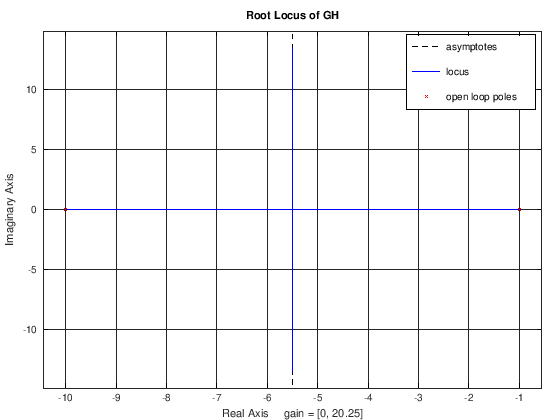

In [3]:
%%octave

s = tf('s')
GH = 10/((s+10)*(s+1))
rlocus(GH)

As you can see, we were 100% right about the breakaway point, about the asymptote angles, and about the asymptote intersection point. For simple systems, this is very straightforward. When things get a little more complex, you'll have to combine your knowledge about the prior steps of the root locus to really apply this "rule" about breakaway/break-in points properly.

### Example 

Let's do a more complex example that illustrates how we can combine our enduring understanding of when the root locus lies on the real axis with this new knowledge we have about how to calculate break-away and break-in points. Let's consider the system we looked at for Monday's assignment:

$$G(s)H(s) =\frac{10}{(s+1)(s+2)(s+3)}$$

Our first for steps from this example are reproduced from Monday's assignment below:

#### Step 1

We find that $1+\frac{1}{(s+1)(s+2)(s+3)}=0$

#### Step 2

We can then write $\frac{-1}{K} = \frac{1}{(s+1)(s+2)(s+3)}$

#### Step 3

Now, we'd like to find segments of the root locus that lie on the real axis and show them on our sketch. First, let's plot the open loop poles and zeros:

Now, we sketch the root locus as being on the real axis wherever we find an odd number of poles and zeros of $G(s)H(s)$ to the right of that portion of the real axis as follows:

#### Step 4

Now our job is to find asymptotes, their intersection point, and their angles. We know that the two branches that started at s=-1 and s=-2 can't stay on the real axis forever... there are no zeros, so the number of asymptotes we expect from the plot is 

$$a = n-m=3-0$$

So we need to find 3 asymptotes. It looks like we've already found 1 of them using step 3... to the left of s=-3, there are always 3 open loop poles to our right, so the root locus is always on the root locus there. But what happens to the two branches that originated at s=-1 and s=-2? They must somehow go to to infinity on the complex plane, and they'll do this by "breaking away" from the real axis somewhere between -2 and -1. The angles of the 3 asymptotes for our system are given by:

$$\theta_a = \frac{2k+1}{n-m}\pi$$

Which we evaluate for k=0, 1, and 2. This gives us the following three asymptote angles:

For k = 0, we get:
$$\theta_1 = \frac{1}{3}\pi$$

For k=1, we get:
$$\theta_2 = \frac{3}{3}\pi$$

And for k=2, we get:
$$\theta_3 = \frac{5}{3}\pi$$

These asymptotes all meet at one place on the real axis. This place is found by computing:

$$\sigma_a = \frac{\sum poles -\sum zeros}{n-m} = \frac{(-1)(-2)(-3)}{3} = -2$$

So the asymptotes are at $60^\circ$, $180^\circ$ (which we alreaday found using step 3), and $300^\circ$, and they meet at $s=-2$. Let's draw these asymptotes on our root locus sketch:

### Step 5

Now, we know that the locus has to "break away" from the real axis to approach these asymptotes, and that it must do this between s=-1 and s=-2 somewhere. We now know that to calculate where this point is, we must take the derivative of $G(s)H(s)$ with respect to $s$, and find where this derivative is 0.

$$\frac{d}{ds}G(s)H(s) = \frac{d}{ds} \frac{1}{s^3+6s^2+11s+6} = \frac{0 - (3s^2+12s+11)}{(s^3+6s^2+11s+6)^2}=0$$

We know that solving for $\frac{d}{ds}G(s)H(s) =0$ is the same as solving for $3s^2+12s+11=0$. If we do this, we find two possible solutions using the quadratic formula: $s_1 = -2.5774$ and $s_2 = -1.423$. Which one is the "real" breakaway point? Well, we know from step 3 that the root locus **only lies on the real axis between -1 and -2, and to the left of -3**. This means that the solution $s_1=-2.5774$ is **not** a true breakaway point... only $s_2 = -1.423$ is. With this information, we also can see that if we call the breakaway point $\sigma_b$ and the asymptote intersection point $\sigma_a$, that $\sigma_a\neq\sigma_b$ for this system. In general, the two points are not and do not have to be equal. We can now finish our root locus sketch more precisely than before, especially since **the angle criterion tells us that the root locus will always enter and leave the real axis perpendicularly**. The proof of this is not given here, but is easy to look up or reproduce if you're interested.

So this concludes our sketch. Let's use Octave to check our work, as usual.

Transfer function 'GH' from input 'u1' to output ...

                1

 y1:  ----------------------

      s^3 + 6 s^2 + 11 s + 6

Continuous-time model.

                                      Root Locus of GH

                  |--------------------------------------------------------|

                  |   +          +          +      +------------------*&&-+|

                2 |-+******************************|###?###asymptotes&&& +||

                  |   *          *          *      |%%%?%%%locus  *&&&    ||

                  |   *          *          *      +---B---open loop poles+|

                1 |-+*******************************************&&*******+-|

                  |   *          *          *          *   **  && *        |

                  |   *          *          *          * **   &&  *        |

                0 |##%%%%%%%%%%%%%%%%%%%%%%%B##########B@@@@@&&&&&B******+-|

                  |   *          *          *          *  $$ @@   *        |

                  |   *          *          *          *    $$@@  *        |

                  |   *          *          *          *      $@@ *        |

               -1 |-+*******************************************@@*******+-|

                  |   *          *          *          *          @@       |

                  |   *          *          *          *          *@@@     |

               -2 |-+************************************************@@@*+-|

                  |   +          +          +          +          +    @@  |

                  |--------------------------------------------------------|

                     -5         -4         -3         -2         -1

                               Real Axis     gain = [0, 28.5]

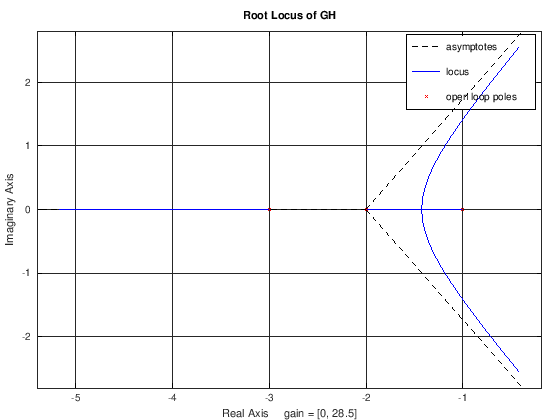

In [4]:
%%octave
s = tf('s');

GH = 1/((s+1)*(s+2)*(s+3))
rlocus(GH)

As you can see, our sketch matches even better than before!! 

The thing that I asked you to notice on Monday about this system's root locus "eventually going unstable" is the focus of Step 6, which we will cover next.

## Step 6: If you suspect that the root locus crosses into the right half of the s-plane, find out where and how

If the real part of an eigenvalue is positive, it means that the system will have a response whose magnitude *increases* exponentially, rather than *decays* exponentially.  A system exhibiting this type of behavior is NOT BIBO stable.  Therefore, the entire region to the right of the origin is unstable.

.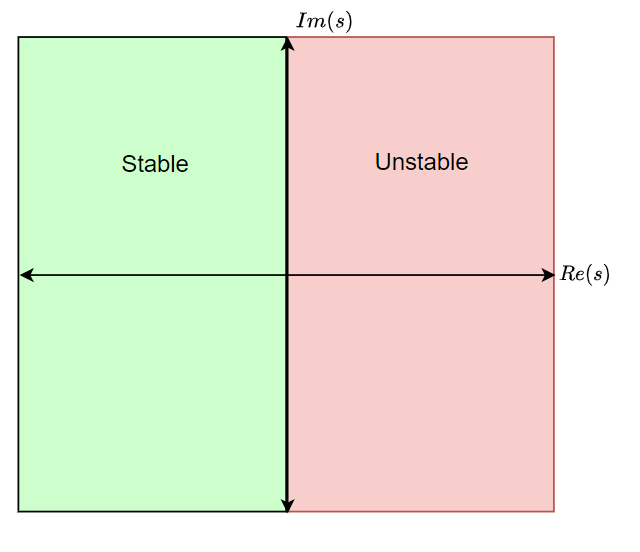


The root locus plot generated in the code cell above shows that at some value of $K$, the system will go unstable. This is **BAD**. Especially if you've approximated a $3^{rd}$ order system as a lower-order system, you may find yourself "unintentionally" crossing into unstable territory if you use a very high-gain or "stiff" controller. Let's unpack step 6 just a little by breaking it into two parts:

**6a.** If you suspect that the root locus crosses into the right half of the s-plane, (based on the asymptote angles)

**6b.** Find out where and how by calculating the crossing frequency (where the system crosses into unstable territory) and critical gain (gain that makes this happen) using the closed loop characteristic equation.

6a asks us to use our intuition to determine whether the system will ever go unstable. This is easier than it sounds. By plotting asymptotes in Step 4, we can see whether the asymptotes themselves cross into the right half of the s-plane. If they do, then we should suspect that eventually, our system goes unstable. Mathematically, "going unstable" means that at least one of (or more commonly, a complex conjugate pair of) the closed-loop eigenvalues will cross into the right half of the s-plane. We know that for this to happen, the real component of the "crossing" eigenvalue will be 0. This leads us to say that while we don't know exactly where the cross happens, we can write the value of $s$ where the system crosses into the unstable region.

Using the generalized form of a complex number in **Cartesian Form** to represent an eigenvalue:

$$s = \sigma + j\omega$$

The eigenvalue where the root locus cross the imaginary axis ($\sigma = 0$) is

$$s_{crossing}=j\omega_{crossing}$$

To solve for where this point is, exactly (in other words, what is $\omega_{crossing}$?), we can do the following:

1. Substitute $s_{crossing} = j\omega_{crossing}$ into our closed loop characteristic equation $1+KG(s)H(s)=0$.


2. Because we know that since $s_{crossing}$ is on the root locus, $\angle \left. G(s)H(s)\right|_{s=s_{crossing}}=\pm 180^\circ$


3. The $K$ that generates the eigenvalue $s_{crossing}$ is called the "critical gain" ($K_{crit}$) and can be used in the characteristic equation: $1+\left.K_{crit}G(s)H(s)\right|_{s=j\omega_{crossing}}=0$, where  $K_{crit}$ and $j\omega_{crossing}$ are both unknown.


4. Because $G(s)H(s)$ has real and imaginary components, we will be able to solve for both $K$ and $\omega_{crossing}$.

This will allow us to find both where $s_{crossing}=j\omega_{crossing}$ is located, and the **critical gain factor** $K_{crit}$ that makes the system go unstable.

### Example

Let's keep working with the example above, with:

$$G(s)H(s) =\frac{10}{(s+1)(s+2)(s+3)} = \frac{10}{s^3+6s^2+11s+6}$$

Now, we know that we can write our characteristic equation evaluated at the critical gain $K_{crit}$ and crossing point $s_{crossing}=j\omega_{crossing}$ as:

$$1+\left.K_{crossing}G(s)H(s)\right|_{s=j\omega_{crossing}}=0$$

Substituting our "open loop transfer function" in, and clearing fractions, we get:

$$s^3+6s^2+11s+6+10K = 0$$

Now, substituting $K=K_{crit}$ and $s = j\omega_{crossing}$ into this equation, we get:

$$(j\omega_{crossing})^3+6(j\omega_{crossing})^2+11(j\omega_{crossing})+6 +10K_{crit}=0$$

Collecting real and imaginary terms here gives us:

$$j(-\omega_{crossing}^3+11\omega_{crossing})+6(1-\omega_{crossing}^2)+10K_{crit}=0$$

We can write the real and imaginary parts of this equation as two separate equations as follows:

Real:
$$ 6(1-\omega_{crossing}^2)+10K_{crit}=0$$
Imaginary:
$$ j(-\omega_{crossing}^3+11\omega_{crossing})=0$$

Now, we have two equations and two unknowns. We can find $\omega_{crossing}$ from the imaginary part of the equation, since $K_{crit}$ doesn't appear as $\omega_{crossing} = 0,\sqrt{11}$. We know that $\omega_{crossing}=0$ is a point on the real axis that we already know is **not** part of the root locus, so we throw this solution out to find $\omega_{crossing}=\sqrt{11}$. Then, substituting this back into the real part of our characteristic equation tells us:

$$6(1-11)+10K_{crit}=0$$

Which gives us $K_{crit}=6$. Now we know **the maximum value of K** that will keep our system stable! That's very, very powerful. This is is fairly easy to check using the root locus functionality in Octave, as shown below, where we will plot our crossover point on the root locus plot that octave generates by finding the roots of our characteristic equation at the critical gain we calculated.

Transfer function 'GH' from input 'u1' to output ...

                1

 y1:  ----------------------

      s^3 + 6 s^2 + 11 s + 6

Continuous-time model.

                                      Root Locus of GH

                  |--------------------------------------------------------|

                  |   +          +          +      +------------------*&&-+|

                2 |-+##############################|###?###asymptotes&&& +||

                  |   #          #          #      |%%%?%%%locus  *&&&    ||

                  |   #          #          #      +---B---open loGp poles+|

                1 |-+########################################**#&&#######+-|

                  |   #          #          #          #   **  && #        |

                  |   #          #          #          # **   &&  #        |

                0 |##%%%%%%%%%%%%G%%%%%%%%%%B##########B@@@@@&&&&&B######+-|

                  |   #          #          #          #  $$ @@   #        |

                  |   #          #          #          #    $$@@  #        |

                  |   #          #          #          #      $@@ #        |

               -1 |-+###########################################@@#######+-|

                  |   #          #          #          #          G@       |

                  |   #          #          #          #          #@@@     |

               -2 |-+################################################@@@#+-|

                  |   +          +          +          +          +    @@  |

                  |--------------------------------------------------------|

                     -5         -4         -3         -2         -1

                               Real Axis     gain = [0, 28.5]

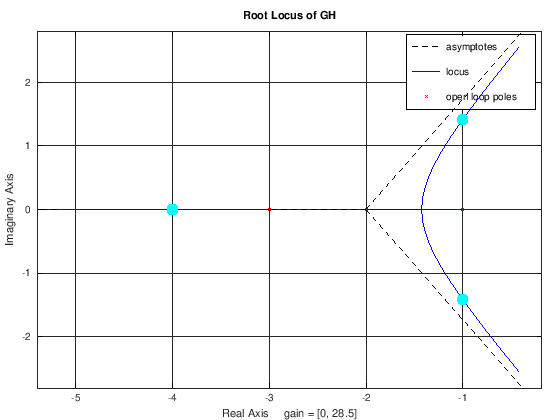

In [5]:
%%octave
s = tf('s');

%set up the open loop TF
GH = 1/((s+1)*(s+2)*(s+3))
%plot the root locus, set hold on
rlocus(GH)
hold on 

%now calculate our eigenvalues at our calculated critical gain so we can see if we were right!
Kcrit = 6;%this is what we calculated by hand
%compute closed loop TF
Gcl = minreal(Kcrit*GH/(1+Kcrit*GH));
%pull out the denominator
[num,den] = tfdata(Gcl,'v');
%find the roots of the characteristic equation
myroots = roots(den);

%plot those roots on our root locus plot
plot(real(myroots),imag(myroots),'c.','MarkerSize',30)%make them huge so we can see them!

As you can see, we were spot on! The system does indeed cross over into the unstable region of the s-plane right when $K=6$. It is worth noting that you can also do this an even easier way using MATLAB by using the "data cursor." You cannot do this in Jupyter, but if you open MATLAB and plot a root locus, you can click on the "data cursor" button to get information about a root locus. An example of this for the system we're discussing is shown below, which also confirms our suspicions about the crossing point and the critical gain.

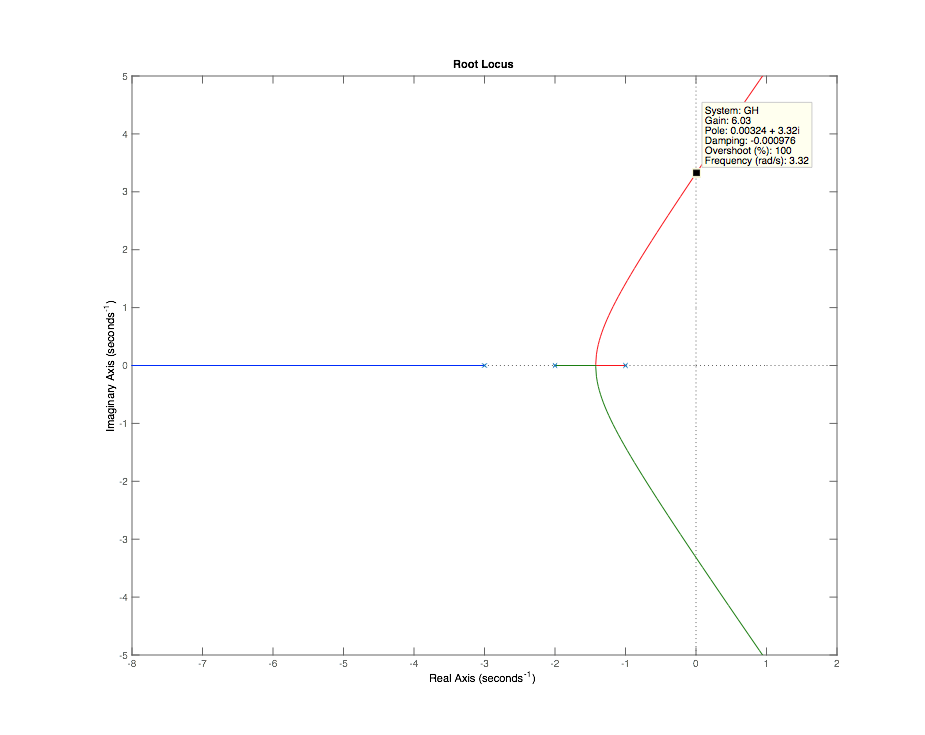

**hint**: to get the most precision out of your data cursor in MATLAB, right click, select "selection style," and select "mouse position."

# Disciplined Process: Steps 1-6 of sketching the root locus

1. Find the Closed loop characteristic equation for your system:
$$1+KG(s)H(s)=0$$
2. Write the Closed loop characteristic equation as 
$$\frac{-1}{K}=G(s)H(s)$$
3. Plot the poles and zeros of $G(s)H(s)$ on the s-plane. Identify any segments of the R.L. on the real axis: the root locus lies on a portion of the root locus if and only if an *odd* number of "open loop" poles and zeros (poles and zeros of $G(s)H(s)$ are to the *right* of that portion of the real axis.
4. Identify the angle(s) of any asymptotes and the point on the real axis where the asymptotes intersect:
$$\sigma_a = \frac{\sum poles -\sum zeros}{n-m}$$
$$\theta_a = \frac{2k+1}{n-m}\pi$$
5. If applicable, calculate any points on the real axis where the root locus "breaks in" to the real axis or "breaks away" from the real axis, using the fact that at such a point,
$$\frac{d}{ds}G(s)H(s)=0$$.
6. If you suspect that the root locus crosses into the right half of the s-plane (based on the asymptote angles), calculate the crossing frequency (where the system crosses into unstable territory) and critical gain (gain that makes this happen) using the closed loop characteristic equation. Plug in the point $s=s_{crossing}=j\omega_{crossing}$ into the open loop transfer function $G(s)H(s)$ to find the value of $K=K_{critical}$ that will result in an unstable system.


# Exercises for steps 1-6 of root locus sketching: Due Monday, October 12 before class.

Sketch the root locus for the following "open loop transfer functions" $G(s)H(s)$ using steps 1 through 6 of the sketching rules. Find breakaway and break-in points, and calculate the crossing point and critical gain for each system if applicable. Include all hand calculations and your hand-sketch. You may check your work using Octave in the provided code cells. You do not know how to calculate angles of departure from complex poles or arrival to complex zeros at this point, so if this looks like something you need to do, just guess for now!

## Exercise 1

$$G(s)H(s) = \frac{s+20}{(s^2+20s+250)(s+1)(s+2)}$$

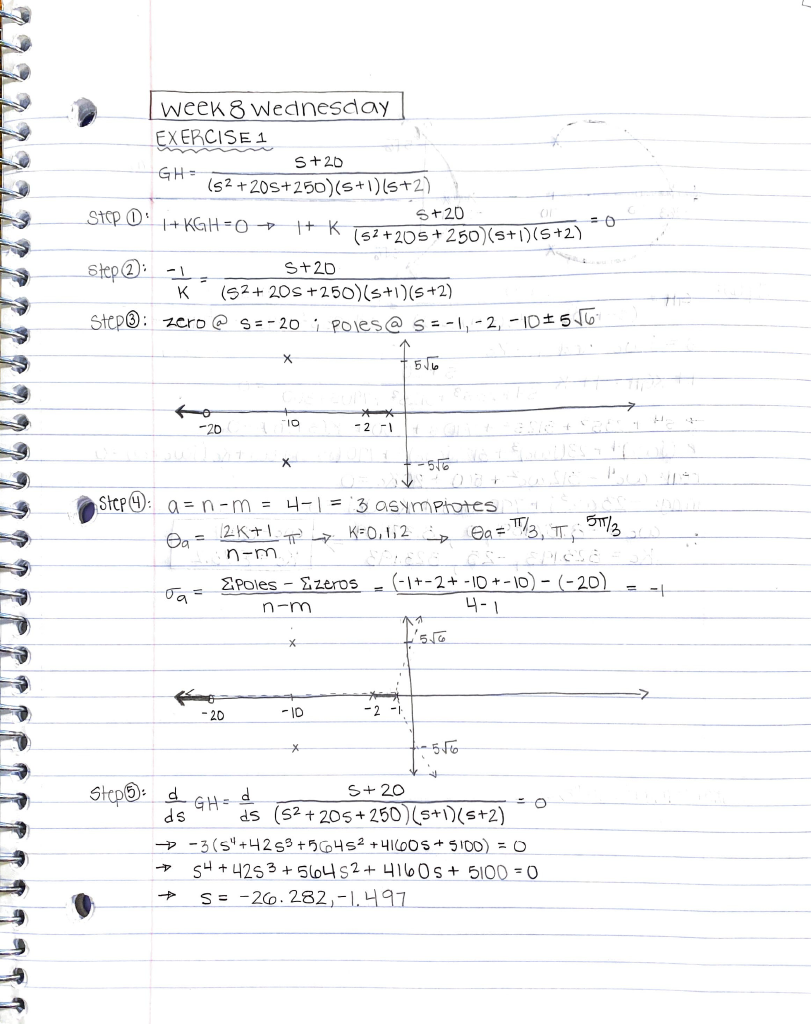

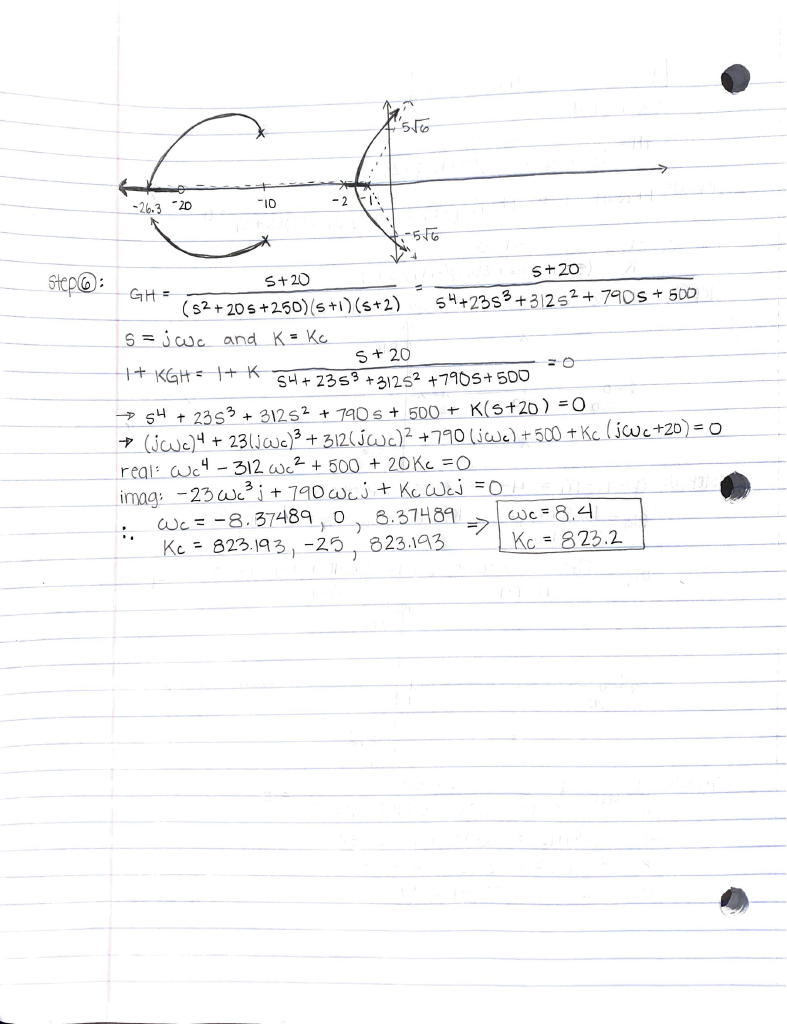

Transfer function 'GH' from input 'u1' to output ...

                     s + 20

 y1:  ------------------------------------

      s^4 + 23 s^3 + 312 s^2 + 790 s + 500

Continuous-time model.

                                       Root Locus of GH

                   |-------------------------------------------------------|

                   |+        +        +        +   +-------------------@@*+|

                60 |%+%%%%%%%%%%%%%%%%%%%%%%%%%%%%%|###?###asymptote@@@@ +||

                   |%        %        %        %   |%%%?%%%locus  @@@     ||

                40 |%+%%%%%%%%%%%%%%%%%%%%%%%%%%%%%|   B   open loop poles||

                   |%        %        %        %   +---F---zeros@---------+|

                20 |%+%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%@@@%%%%%%%%%%%+%|

                   |%        %        %        %===G    @@@      %        %|

                 0 |##&&&&&&&&&&&&&&&&&&&&&&===F=######BG$$%%%%%%%%%%%%%%+%|

                   |%        %        %     &&&&&      %G  $$    %        %|

                   |%        %        %        %&&&G    %%%  $$  %        %|

               -20 |%+%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%$$%%%%%%%%+%|

                   |%        %        %        %        %    %%%%$$$      %|

               -40 |%+%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%$$%%%+%|

                   |%        %        %        %        %        %%%% $$  %|

               -60 |%+%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%%$$%|

                   |+        +        +        +        +        +     %% $|

                   |-------------------------------------------------------|

                   -80      -60      -40      -20       0       20       40

                               Real Axis     gain = [0, 461204]

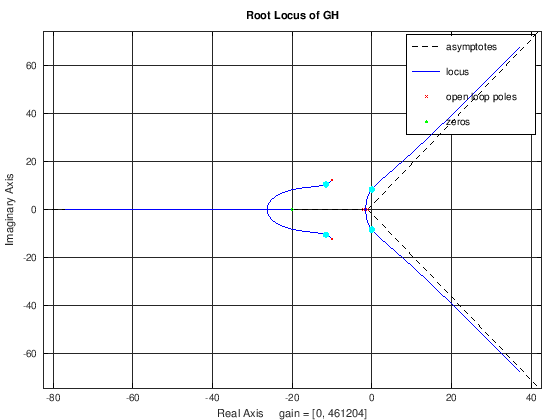

In [12]:
%%octave 
s = tf('s');

%set up the open loop TF
GH = (s+20)/((s+1)*(s+2)*(s^2+20*s+250))
rlocus(GH)
hold on 

%now calculate our eigenvalues at our calculated critical gain so we can see if we were right!
Kcrit = 823.193;%this is what we calculated by hand
%compute closed loop TF
Gcl = minreal(Kcrit*GH/(1+Kcrit*GH));
%pull out the denominator
[num,den] = tfdata(Gcl,'v');
%find the roots of the characteristic equation
myroots = roots(den);

%plot those roots on our root locus plot
plot(real(myroots),imag(myroots),'c.','MarkerSize',15)

## Exercise 2

$$G(s)H(s) = \frac{s+10}{(s^2+20s+250)}$$

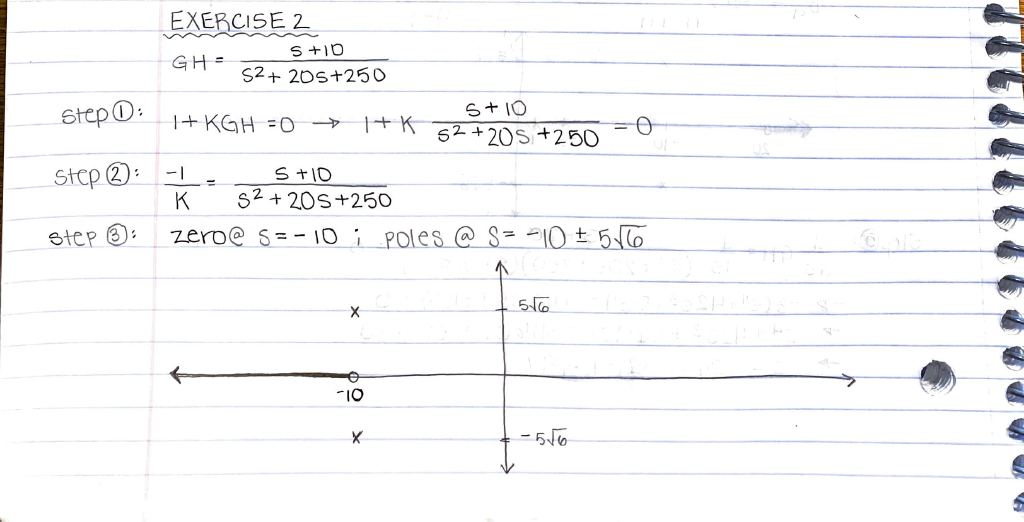

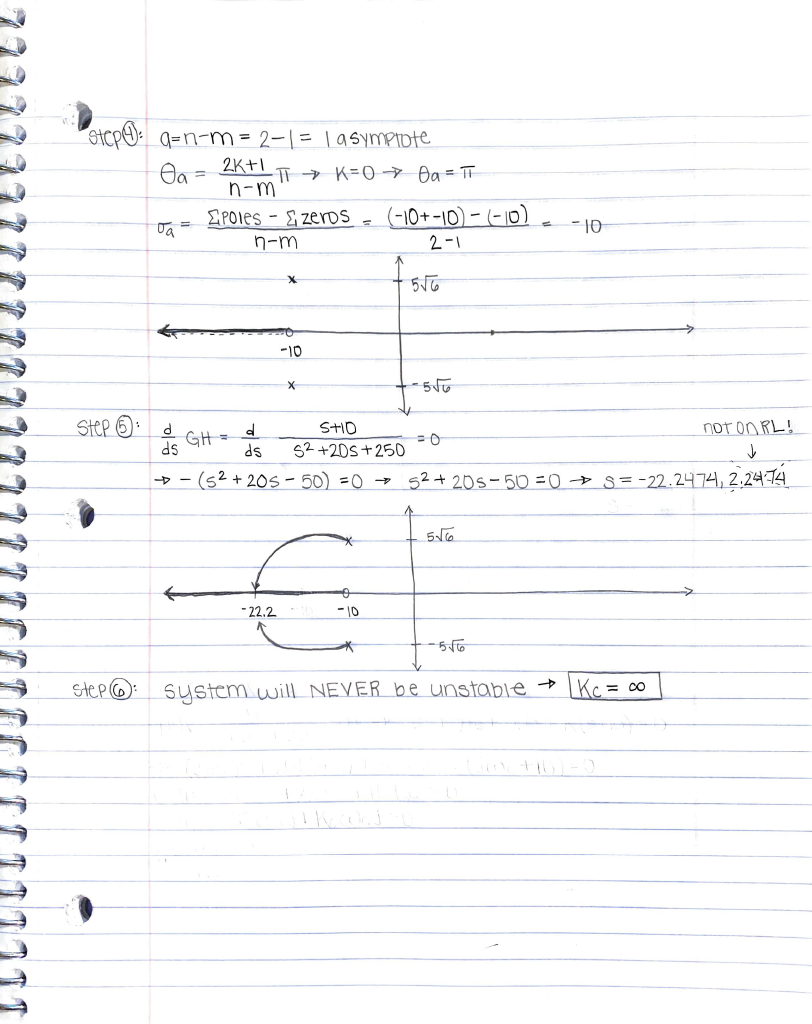

Transfer function 'GH' from input 'u1' to output ...

           s + 10

 y1:  ----------------

      s^2 + 20 s + 250

Continuous-time model.

                                       Root Locus of GH

                   |-------------------------------------------------------|

                   |    +      +      +      +     +-------------$$$$$$$B-+|

                10 |-+&&&&&&&&&&&&&&&&&&&&&&&&&&&&&|###?###loc$$$$       +||

                   |    &      &      &      &     |   B   open loop poles||

                   |    &      &      &      &     +---F--$zeros----------+|

                 5 |-+&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&$$&&&&&&&&&&&&&&+-|

                   |    &      &      &      &      &   $$ &      &     &  |

                   |    &      &      &      &      &   $  &      &     &  |

                 0 |**#################################$$$$$$$$$$$$$****F+-|

                   |    &      &      &      &      &  ##  &      &     &  |

                   |    &      &      &      &      &   #  &      &     &  |

                   |    &      &      &      &      &   ## &      &     &  |

                -5 |-+&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&##&&&&&&&&&&&&&&+-|

                   |    &      &      &      &      &     ##      &     &  |

                   |    &      &      &      &      &      &###   &     &  |

               -10 |-+&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&&####&&&&&&&+-|

                   |    +      +      +      +      +      +     #######B  |

                   |-------------------------------------------------------|

                       -45    -40    -35    -30    -25    -20    -15   -10

                               Real Axis     gain = [0, 40.8248]

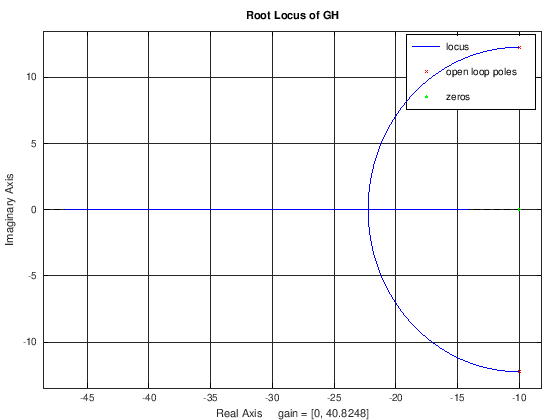

In [13]:
%%octave 
s = tf('s');

%set up the open loop TF
GH = (s+10)/(s^2+20*s+250)
rlocus(GH)